In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wyattowalsh/regularized-linear-regression-deep-dive/master/data/winequality-red.csv", sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
def test_train_split(df, proportion_train):
    """Shuffles and splits given dataframe
    Params:
        df - Pandas dataframe to be split
        proportion_train - Ratio between 0 and 1
    Returns:
        Tuple of training dataframe and testing dataframe split from input dataframe
    """
    shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split = math.floor(len(shuffled) * proportion_train)
    train = shuffled.iloc[:split, :]
    test = shuffled.iloc[split:, :].reset_index(drop=True)
    return train, test

In [4]:
train, test = test_train_split(data, 0.8)

In [5]:
train_vals, test_vals = train.to_numpy(), test.to_numpy() 
# X_train = train_vals[:, 0:-1]
y_train = train_vals[:, [-1]]
# X_test = test_vals[:, 0:-1]
# y_test = test_vals[:, [-1]]
X_train = train_vals[:,1:4]
X_train

array([[ 0.56,  0.08,  2.5 ],
       [ 0.5 ,  0.17,  1.6 ],
       [ 0.67,  0.22,  2.7 ],
       ...,
       [ 0.31,  0.78, 13.9 ],
       [ 0.55,  0.24,  2.  ],
       [ 0.52,  0.07,  1.4 ]])

In [6]:
# x = X_train
# y = X_train
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.scatter(x, y, c=y, cmap='Spectral')
# plt.colorbar()
# plt.title('Simple Scatter plot')
# plt.xlabel('X - value')
# plt.ylabel('Y - value')
# plt.show()

In [7]:
from scipy import linalg
x_approx = linalg.lstsq(X_train, y_train)[0]
x_approx

array([[6.08480809],
       [5.80941224],
       [0.23368898]])

In [8]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

In [9]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [10]:
M = x[:, np.newaxis]**[0, 2]
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

In [11]:
p, res, rnk, s = lstsq(M, y)
p

array([0.20925829, 0.12013861])

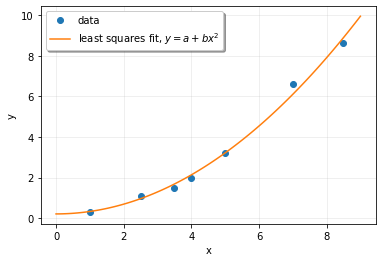

In [12]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

In [13]:
yy

array([0.20925829, 0.21023141, 0.21315078, 0.21801639, 0.22482825,
       0.23358635, 0.2442907 , 0.2569413 , 0.27153814, 0.28808123,
       0.30657056, 0.32700614, 0.34938796, 0.37371603, 0.39999034,
       0.4282109 , 0.4583777 , 0.49049075, 0.52455005, 0.56055559,
       0.59850738, 0.63840541, 0.68024968, 0.72404021, 0.76977697,
       0.81745999, 0.86708925, 0.91866475, 0.9721865 , 1.0276545 ,
       1.08506874, 1.14442922, 1.20573596, 1.26898893, 1.33418816,
       1.40133362, 1.47042534, 1.5414633 , 1.6144475 , 1.68937795,
       1.76625464, 1.84507759, 1.92584677, 2.0085622 , 2.09322388,
       2.1798318 , 2.26838597, 2.35888638, 2.45133304, 2.54572595,
       2.6420651 , 2.74035049, 2.84058213, 2.94276002, 3.04688415,
       3.15295453, 3.26097115, 3.37093402, 3.48284313, 3.59669849,
       3.71250009, 3.83024794, 3.94994204, 4.07158238, 4.19516897,
       4.3207018 , 4.44818087, 4.5776062 , 4.70897776, 4.84229558,
       4.97755964, 5.11476994, 5.25392649, 5.39502929, 5.53807